### Scrape
- Scrape the most recent Narendra Modi's tweet or
- New articles for NDTV
### Perform the below tasks
 - Clean the tweete
 - Create the DTM using CountVectorizer; set min_df=5
 - Using KMeans algorithm, cluster the tweets in to 4 groups
 - Get the:
     - top 5 hashtags in each group (only applicable for twitter data)
     - top 5 words in each group
 - Create word cloud for each group 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
NMT=pd.read_json("D:/Shakeer/Unstructured/Narendra Modi Tweets.json")

In [3]:
NMT=NMT[NMT['Lang']=='en']

In [4]:
twt=TweetTokenizer()

In [5]:
NMT_combined=twt.tokenize(" ".join(NMT['Text']).lower())

In [6]:
print(NMT_combined)

['addressed', 'the', 'global', 'potato', 'conclave', 'at', 'gandhinagar', 'via', 'video-conferencing', '.', 'shared', 'how', 'indian', 'farmers', 'are', 'taking', '…', 'https://t.co/zxhwjhw5ht', 'extremely', 'touched', 'by', 'the', 'lovely', '#republicday', 'wishes', '@pmbhutan', '!', 'you', 'have', 'wonderfully', 'highlighted', 'the', 'unbreakable', 'bo', '…', 'https://t.co/9rzbawtks3', 'tributes', 'to', 'the', 'great', 'balasaheb', 'thackeray', 'on', 'his', 'jayanti', '.', 'courageous', 'and', 'indomitable', ',', 'he', 'never', 'hesitated', 'from', 'raisi', '…', 'https://t.co/kxt7u7wq9p', 'india', 'will', 'always', 'remain', 'grateful', 'to', 'netaji', 'subhas', 'chandra', 'bose', 'for', 'his', 'bravery', 'and', 'indelible', 'contribution', 'to', 'resis', '…', 'https://t.co/ewe0bia91w', 'on', '23rd', 'january', '1897', ',', 'janakinath', 'bose', 'wrote', 'in', 'his', 'diary', ',', '“', 'a', 'son', 'was', 'born', 'at', 'midday', '.', '”', 'this', 'son', 'became', 'a', 'valorous', 'f',

In [7]:
from nltk.tokenize import regexp_tokenize
stop_nltk=stopwords.words('english')+list(punctuation)
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
update_text=[word for word in NMT_combined if word not in stop_nltk and len(word)>2]
print(update_text)

['addressed', 'global', 'potato', 'conclave', 'gandhinagar', 'via', 'video-conferencing', 'shared', 'indian', 'farmers', 'taking', 'https://t.co/zxhwjhw5ht', 'extremely', 'touched', 'lovely', '#republicday', 'wishes', '@pmbhutan', 'wonderfully', 'highlighted', 'unbreakable', 'https://t.co/9rzbawtks3', 'tributes', 'great', 'balasaheb', 'thackeray', 'jayanti', 'courageous', 'indomitable', 'never', 'hesitated', 'raisi', 'https://t.co/kxt7u7wq9p', 'india', 'always', 'remain', 'grateful', 'netaji', 'subhas', 'chandra', 'bose', 'bravery', 'indelible', 'contribution', 'resis', 'https://t.co/ewe0bia91w', '23rd', 'january', '1897', 'janakinath', 'bose', 'wrote', 'diary', 'son', 'born', 'midday', 'son', 'became', 'valorous', 'https://t.co/b3shstu7nm', 'line', 'focus', 'speedy', 'timely', 'completion', 'projects', 'reviewed', 'eleven', 'key', 'projects', 'https://t.co/ktkehemdmu', 'excellent', 'pragati', 'session', 'today', 'wide', 'range', 'policy', 'initiatives', 'development', 'projects', 'htt

In [9]:
stemmer_s=SnowballStemmer("english")
lemm=WordNetLemmatizer()

In [10]:
text_stem=[lemm.lemmatize(word) for word in update_text]
print(text_stem)

['addressed', 'global', 'potato', 'conclave', 'gandhinagar', 'via', 'video-conferencing', 'shared', 'indian', 'farmer', 'taking', 'https://t.co/zxhwjhw5ht', 'extremely', 'touched', 'lovely', '#republicday', 'wish', '@pmbhutan', 'wonderfully', 'highlighted', 'unbreakable', 'https://t.co/9rzbawtks3', 'tribute', 'great', 'balasaheb', 'thackeray', 'jayanti', 'courageous', 'indomitable', 'never', 'hesitated', 'raisi', 'https://t.co/kxt7u7wq9p', 'india', 'always', 'remain', 'grateful', 'netaji', 'subhas', 'chandra', 'bose', 'bravery', 'indelible', 'contribution', 'resis', 'https://t.co/ewe0bia91w', '23rd', 'january', '1897', 'janakinath', 'bose', 'wrote', 'diary', 'son', 'born', 'midday', 'son', 'became', 'valorous', 'https://t.co/b3shstu7nm', 'line', 'focus', 'speedy', 'timely', 'completion', 'project', 'reviewed', 'eleven', 'key', 'project', 'https://t.co/ktkehemdmu', 'excellent', 'pragati', 'session', 'today', 'wide', 'range', 'policy', 'initiative', 'development', 'project', 'https://t.c

In [11]:
word_cloud=WordCloud(width=800,height=800,
                    background_color='white',
                    max_words=150).\
generate(" ".join(text_stem).replace('https','').replace('co',''))

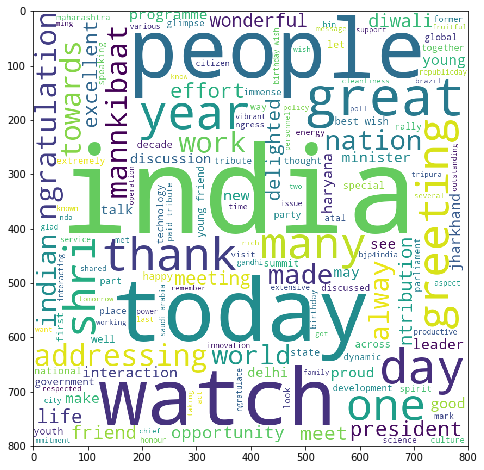

In [12]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [13]:
def clean_txt(sent):
    NMT_combined=twt.tokenize(sent.lower())
    stop_nltk=stopwords.words('english')+list(punctuation)+['']
    update_text=[word for word in NMT_combined if word not in stop_nltk and len(word)>2]
    text_stem=[lemm.lemmatize(word) for word in update_text]
    res=" ".join(text_stem)
    return res.replace('https','').replace('co','')

In [14]:
NMT['cleared_text']=NMT.Text.apply(clean_txt)
NMT.head()

,Text,Lang,Source,Time,Retweets,cleared_text
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388,addressed global potato nclave gandhinagar via...
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591,extremely touched lovely #republicday wish @pm...
100,Tributes to the great Balasaheb Thackeray on h...,en,Twitter for iPhone,1579748075000,8817,tribute great balasaheb thackeray jayanti urag...
101,India will always remain grateful to Netaji Su...,en,Twitter Media Studio,1579747999000,9996,india always remain grateful netaji subhas cha...
102,"On 23rd January 1897, Janakinath Bose wrote in...",en,Twitter for iPhone,1579747828000,8500,23rd january 1897 janakinath bose wrote diary ...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
count_vect = CountVectorizer(min_df=5)

In [17]:
x=count_vect.fit_transform(NMT['cleared_text'])

In [18]:
DTM_x=pd.DataFrame(x.toarray(),columns=count_vect.get_feature_names())
DTM_x.head()

,130,150,2019,2020,across,act,addressing,affection,air,already,...,work,worked,working,world,would,year,yesterday,young,youngster,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=0)
y_kmeans=kmeans.fit_predict(DTM_x)

In [20]:
DTM_x['cluster']=y_kmeans

In [21]:
DTM_x.head()

,130,150,2019,2020,across,act,addressing,affection,air,already,...,worked,working,world,would,year,yesterday,young,youngster,youth,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Top 5 words in each group

In [22]:
BOW=count_vect.get_feature_names()
num_clusters=len(DTM_x.cluster.unique())

In [23]:
print("Top term per cluster")
#Get the index of the cluster centers in reverse order for every cluster
#step 1:
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
#step 2:
for i in range(num_clusters):
    print('\n')
    print("cluster :",i)
    for ind in order_centroids_arg[i,: 5]:
        #To get the dominating term per cluster
        print(BOW[ind])

Top term per cluster


cluster : 0
india
friend
proud
together
always


cluster : 1
today
people
year
great
young


cluster : 2
watch
addressing
speaking
rally
bjp


cluster : 3
greeting
birthday
wish
shri
day


In [24]:
# Word Cloud for each group

Top term per cluster


cluster : 0


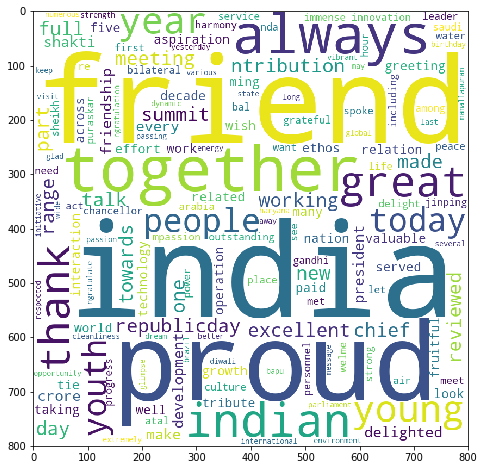



cluster : 1


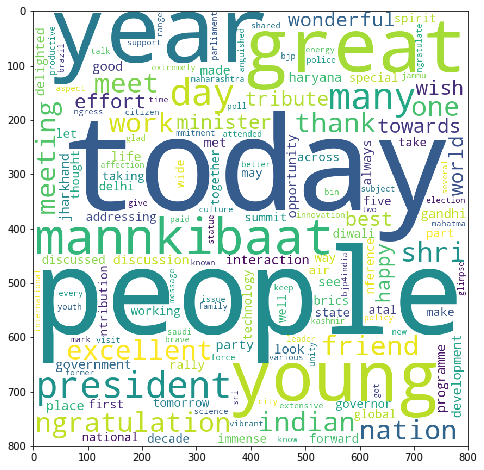



cluster : 2


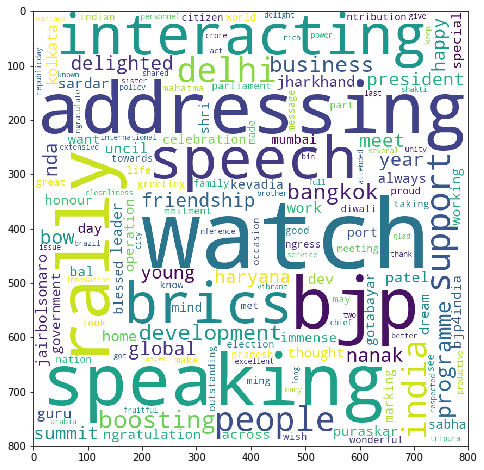



cluster : 3


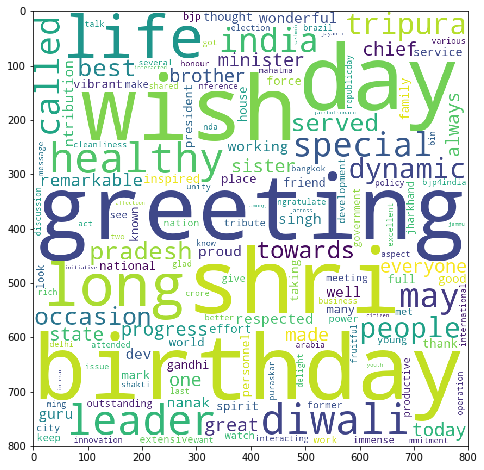

In [25]:
print("Top term per cluster")
#Get the index of the cluster centers in reverse order for every cluster
#step 1:
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
#step 2:
for i in range(num_clusters):
    l=[]
    print('\n')
    print("cluster :",i)
    for ind in order_centroids_arg[i,:]:
        #print(BOW[ind])
        l.append(BOW[ind])
    word_cloud=WordCloud(width=800,height=800,background_color='white',max_words=150).generate(" ".join(l))
    plt.figure(figsize=[8,8])
    plt.imshow(word_cloud)
    plt.show()

# Top 5 hastags in each group

In [26]:
def clean_text(sent):
    NMT_combined=regexp_tokenize(sent.lower(),'#[\w]+')
    stop_nltk=stopwords.words('english')+list(punctuation)
    update_text=[word for word in NMT_combined if word not in stop_nltk and len(word)>2]
    text_stem=[lemm.lemmatize(word) for word in update_text]
    res=" ".join(text_stem)
    return res.replace('https','').replace('co','')

In [27]:
NMT['hastags_text']=NMT.Text.apply(clean_text)
NMT.head()

,Text,Lang,Source,Time,Retweets,cleared_text,hastags_text
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388,addressed global potato nclave gandhinagar via...,
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591,extremely touched lovely #republicday wish @pm...,#republicday
100,Tributes to the great Balasaheb Thackeray on h...,en,Twitter for iPhone,1579748075000,8817,tribute great balasaheb thackeray jayanti urag...,
101,India will always remain grateful to Netaji Su...,en,Twitter Media Studio,1579747999000,9996,india always remain grateful netaji subhas cha...,
102,"On 23rd January 1897, Janakinath Bose wrote in...",en,Twitter for iPhone,1579747828000,8500,23rd january 1897 janakinath bose wrote diary ...,


In [28]:
count_vect1=CountVectorizer()
y=count_vect1.fit_transform(NMT['hastags_text'])
DTM_y=pd.DataFrame(y.toarray(),columns=count_vect1.get_feature_names())
DTM_y.head()

,100yearsofassocham,asean2019,bharatkilaxmi,cab,cab2019,changewithin,chennainnect,diwali,gandhi150,gandhijayanti,...,nitilecture,nstitutionday,parikshapecharcha2020,plogforcleanplanet,plogforswachhbharat,republicday,republicsummit,singaporeindiahackathon,solareclipse2019,thukmat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Top 5 hastags in each group

In [29]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=0)
y_kmeans=kmeans.fit_predict(DTM_y)

In [30]:
DTM_y['cluster']=y_kmeans

In [31]:
DTM_y.head()

,100yearsofassocham,asean2019,bharatkilaxmi,cab,cab2019,changewithin,chennainnect,diwali,gandhi150,gandhijayanti,...,nstitutionday,parikshapecharcha2020,plogforcleanplanet,plogforswachhbharat,republicday,republicsummit,singaporeindiahackathon,solareclipse2019,thukmat,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
BOW1=count_vect1.get_feature_names()
num_clusters1=len(DTM_y.cluster.unique())
num_clusters1

4

In [33]:
print("Top term per cluster")
#Get the index of the cluster centers in reverse order for every cluster
#step 1:
order_centroids_arg=kmeans.cluster_centers_.argsort()[:,::-1]
#step 2:
for i in range(num_clusters1):
    print('\n')
    print("cluster :",i)
    for ind in order_centroids_arg[i,: 5]:
        #To get the dominating term per cluster
        print(BOW1[ind])
        

Top term per cluster


cluster : 0
gandhi150
htls2019
nstitutionday
parikshapecharcha2020
singaporeindiahackathon


cluster : 1
republicday
thukmat
htls2019
asean2019
bharatkilaxmi


cluster : 2
mannkibaat
diwali
republicday
gandhi150
htls2019


cluster : 3
diwali
thukmat
htls2019
asean2019
bharatkilaxmi
